In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv('train.csv')

In [189]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
df.shape

(891, 12)

### Univariate analysis on numerical columns


In [191]:
# we judge each feature independently
# the distribution of each feature to identify it's shape, central tendency and dispersion
# we identify potential issues such as skewness, outliers and missing vals

In [192]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
# the goal is to make a predictive model that calculates the probability of a passenger's survival

In [195]:
# age column, we start w/ numerical cols

In [196]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

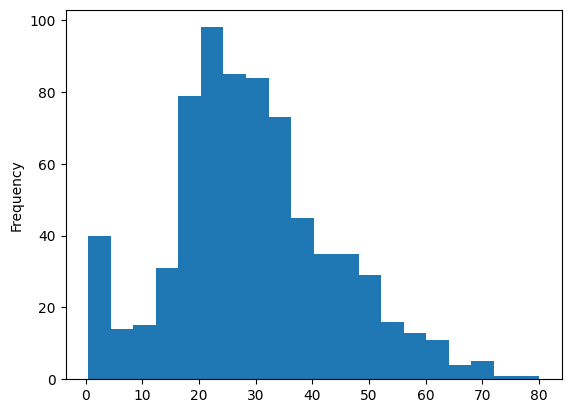

In [197]:
#we now start plotting graphs, we generally start with a histogram
df['Age'].plot(kind='hist', bins = 20)

<Axes: xlabel='Age', ylabel='Density'>

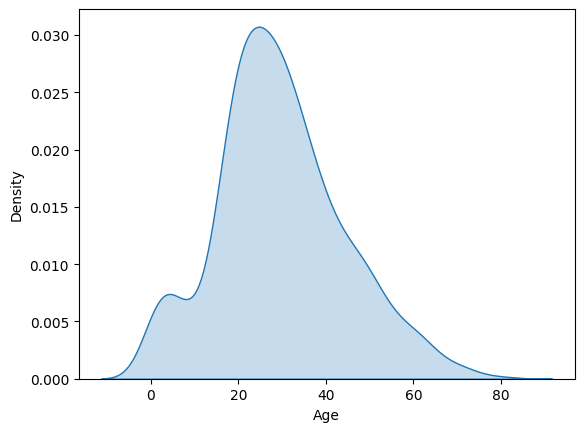

In [198]:
sns.kdeplot(data = df['Age'], fill = 'True')

In [199]:
# we can use the skew function to calculate skewness
# if val is near 0, close to normal dist (good for eda), if too +ve, +vely skewed data, if too -ve, -vely skewed data
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: ylabel='Age'>

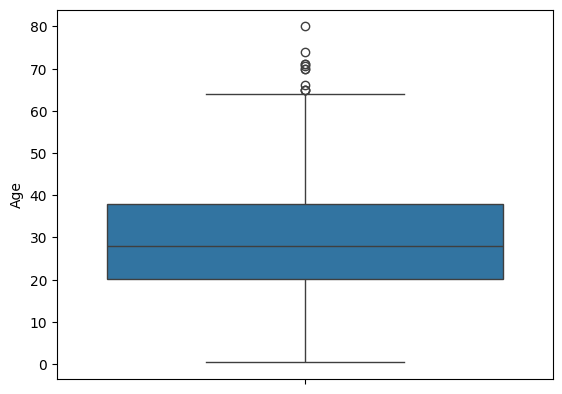

In [200]:
sns.boxplot(data = df['Age'])
# we can see ages ~65 - ~80 are treated as outliers, 65 is max val

In [201]:
df[df['Age']>65]
# we can study if outliers are actually a part of the dataset, or if they have been wrongly included
# for example, if a passenger is 300 years old, it is obvious this is a mistake and outlier needs to be dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [202]:
df['Age'].isnull().sum()

np.int64(177)

In [203]:
#we can see % of missing vals
df['Age'].isnull().sum() / len(df['Age'])
# we know that 19% of age values are missing, this means for every 5 passengers, one passenger's age is missing

np.float64(0.19865319865319866)

In [204]:
#conclusions on age column:
#1) Data is normally distributed
#2) ~20% of values are missing
#3) There are some outliers

In [205]:
# Fare columns

In [206]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [207]:
df['Fare'].describe()
#std (standard deviation tells us how much the values of a feature differ from the mean val)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [208]:
df['Fare'].skew()
#very positively skewed

np.float64(4.787316519674893)

<Axes: xlabel='Fare', ylabel='Density'>

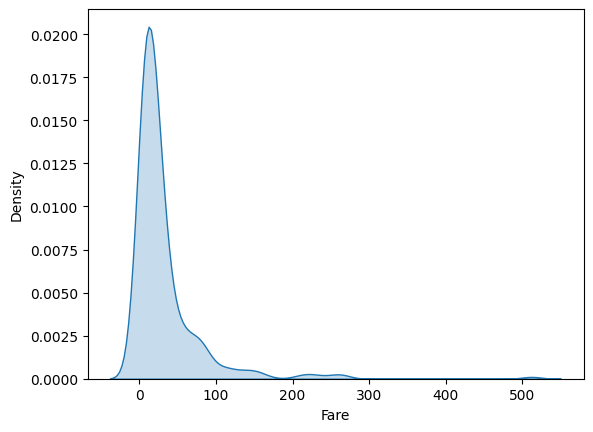

In [209]:
sns.kdeplot(data = df['Fare'], fill = True)

<Axes: ylabel='Fare'>

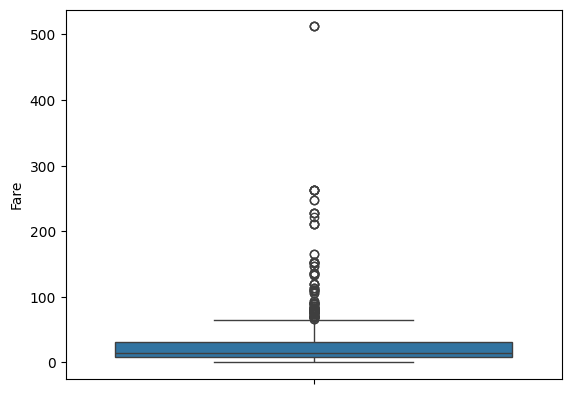

In [210]:
sns.boxplot(data = df['Fare'])

In [211]:
df[df['Fare']>250]
# we analyze all columns when looking at outliers, not just fare
#so here we can see some outliers in fares that have a comparatively higher fare,
# but we can see the ticket IDs for those high fares are the same, so it's safe to assume that the fare 
# in the dataset stores fare for all members occupying the same cabins(s) and not the individual fare
# for each person

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [212]:
df['Fare'].isnull().sum()

np.int64(0)

In [213]:
#conclusions on fare column
# 1) data is highly positively skewed -> so tests that are suitable for normally distributed data won't work on Fare
# 2) there are outliers
# 3) There are no missing values
# 4) the fares stored are the group fares and not the individual fare(might be an issue)
# 5) need to create a new column called individual fare

### Univariate analysis on categorical columns

In [214]:
#descriptive stats -> compute frequency distribution
#visualizations -> count(bar) plots and pie charts
#missing vals

In [215]:
#doing univariate analysis on survived column
df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [216]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

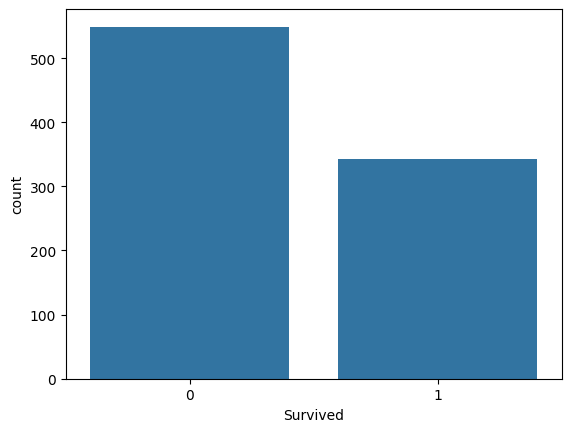

In [217]:
sns.barplot(data = df['Survived'].value_counts())

In [218]:
#less people survived

<Axes: ylabel='count'>

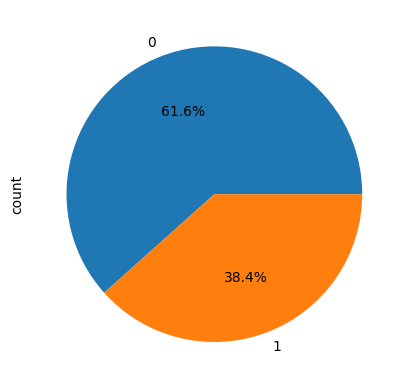

In [219]:
df['Survived'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [220]:
df['Survived'].isnull().sum()

np.int64(0)

In [221]:
#conclusions on survived feature
#we know that 61.6% of people didn't survive
# there are no mussing values 
# it is clear that the accident was very deadly and had a lot of casualties 

In [222]:
#Pclass columns

In [223]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [224]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [225]:
#most people traveled in class 3 than class 1 or 2

<Axes: xlabel='Pclass', ylabel='count'>

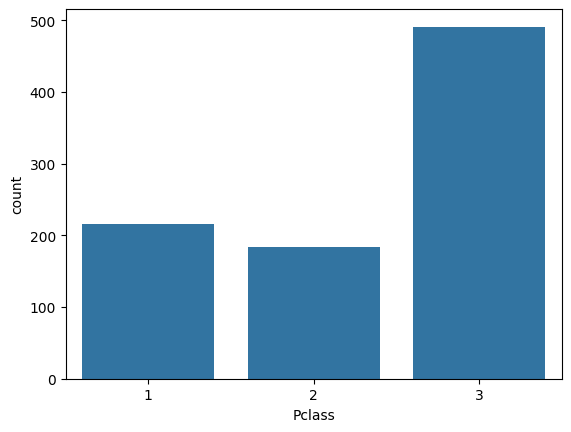

In [226]:
sns.barplot(df['Pclass'].value_counts())

<Axes: ylabel='count'>

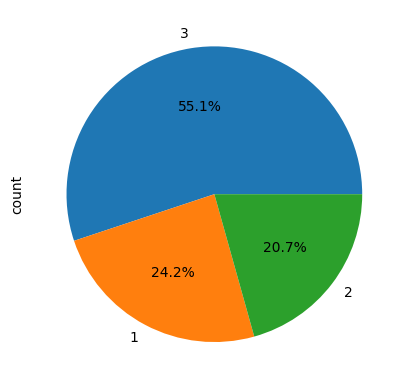

In [227]:
df['Pclass'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [228]:
df['Pclass'].value_counts()[1] + df['Pclass'].value_counts()[2] 

np.int64(400)

In [229]:
df['Pclass'].isnull().sum()

# conclusions on Pclass
# class 3 had more people than class 1 and 2 combined. Clearly, that class was the most desirable
# no null values

np.int64(0)

In [230]:
#sex column
df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

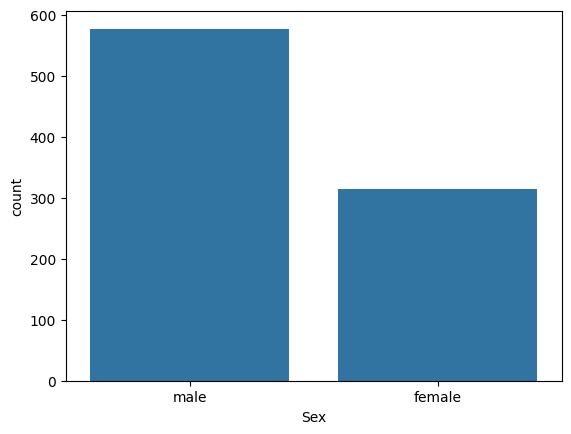

In [231]:
sns.barplot(data = df['Sex'].value_counts())

<Axes: ylabel='count'>

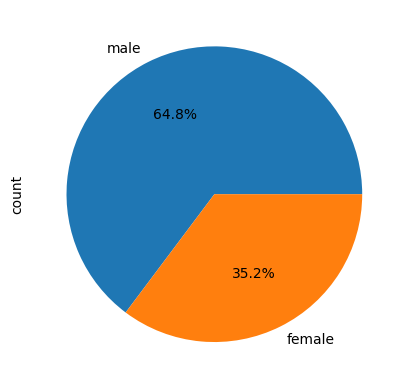

In [232]:
df['Sex'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [233]:
df['Sex'].isnull().sum()

np.int64(0)

In [234]:
#conclusions on sex column
# 1) ~65% of the passengers were male
# 2) no missing values
# 3) looks like straightforward data, no further exploration needed as of now

In [235]:
#SibSp column (num of siblings and spouses)

In [236]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [237]:
# we can see that most people traveled alone, and some traveled with a sibling/spouse

<Axes: xlabel='SibSp', ylabel='count'>

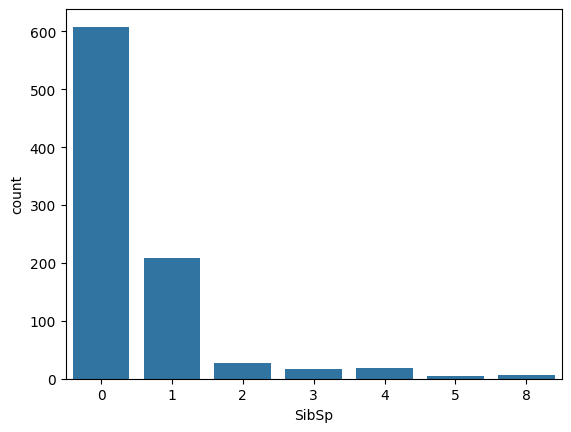

In [238]:
sns.barplot(data = df['SibSp'].value_counts())

<Axes: ylabel='count'>

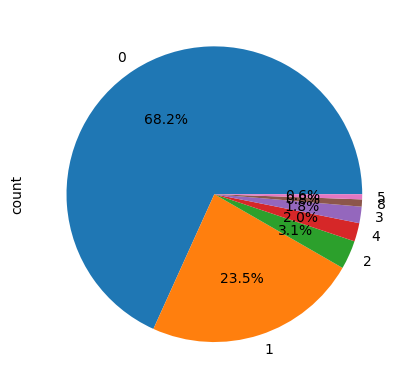

In [239]:
df['SibSp'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [240]:
# conclusions on SibSp
# 1) most people traveled alone (68%)
# 2) some people traveled with a sibling/spouse(23%)
# 3) the rest of the passengers traveled with 2 or more people
# 4) no passenger traveled with more than 8 people
# 5) no passenger traveled with 6 or 7 people

In [241]:
#same process applied to Parch column (parent-child)

In [242]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

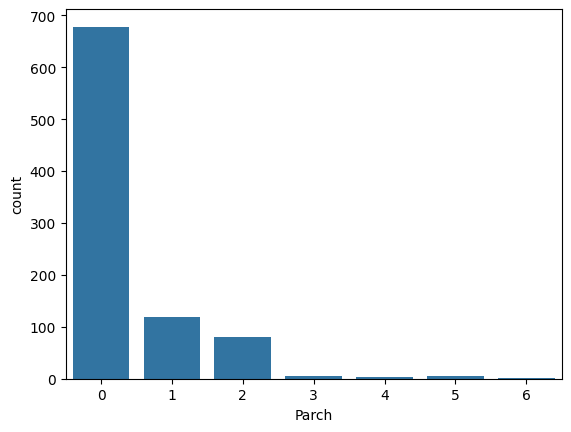

In [243]:
sns.barplot(data = df['Parch'].value_counts())

<Axes: ylabel='count'>

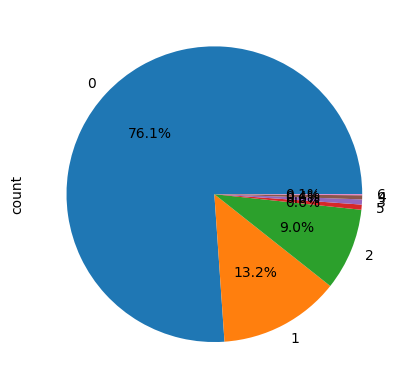

In [244]:
df['Parch'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [245]:
#conclusions
#1) most people traveled alone (76%)
#2) some people traveled with one child (13%) or two children (9%)
#3) only one person traveled w/ 6 children
#4) no one traveled with more than 6 children

#5)Parch and SibSp can be merged to create a new column called family size (since both cols indicate how many people a passenger traveled with)
#6) an is_alone column can be made

In [246]:
# embarked column
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

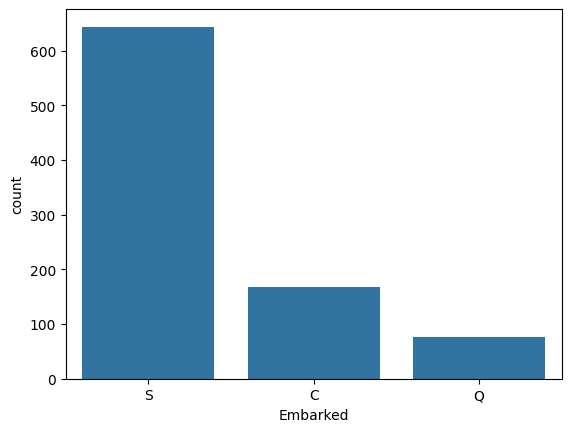

In [247]:
sns.barplot(data = df['Embarked'].value_counts())

<Axes: ylabel='count'>

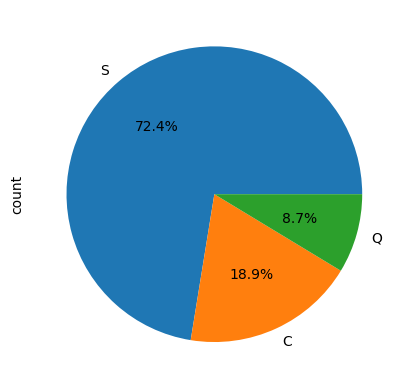

In [248]:
df['Embarked'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [249]:
#most people embarked from S

### Bivariate Analysis

In [250]:
# Select 2 cols
# understand type of relationship

# 1. Numerical - Numerical 
#   a) plot scatterplots (regression plots), 2D hisplots, 2D KDEplots
#   b) check corr coeff to check if relationship is linear

#2. Numerical - Categorical (create visuals that compare dist of numerical data across diff categories of the categorical data)
#   a)plot graphs like barplots, boxplots, violin plots and even scatterplots

#3. Categorical-Categorical
#   a) Create cross-tabulations or contingency tables that show the dist of values in one categorical col, grouped by the vals in other categorical col
#   b) plot heatmaos, stacked barplots, treemaps

#finally, make conclusions

In [251]:
df
#since it takes a lot of time to do bivariate analysis on each combination of features, we pick the most important feature(s) instead
#in this case, we pick survived column (which is our target column)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [252]:
# CATEGORICAL VS CATEGORICAL
#analyzing the relationship b/w survived and p class (2 categorical cols)

In [253]:
pd.crosstab(df['Survived'], df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [254]:
# we know that for Pclass = 1 -> 136 survived, 80 didn't survive...

In [255]:
#we can normalize this for % (better analysis)

In [256]:
#to get survival % for each Pclass, we can normalize and * 100
pd.crosstab(df['Survived'], df['Pclass'], normalize = 'columns') * 100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


In [257]:
# we now know that Pclass 3 was the most dangerous class, and Pclass 1 was the safest one. P class 1 passengers were possibly given more priority in safety precautions??

<Axes: xlabel='Pclass', ylabel='Survived'>

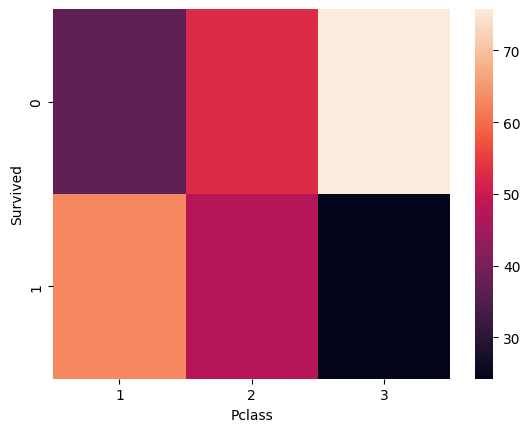

In [258]:
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize = 'columns') * 100)

In [259]:
# let's analyze survived vs sex

In [260]:
pd.crosstab(df['Survived'], df['Sex'], normalize = 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

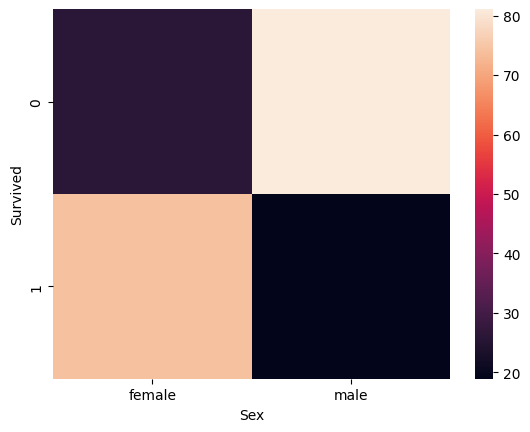

In [261]:
sns.heatmap(pd.crosstab(df['Survived'], df['Sex'], normalize = 'columns')*100)

In [262]:
# we know that the male survival rate was far less than compared to females.
# Female survival was possibly given more priority??

In [263]:
#survived vs embarked

In [264]:
pd.crosstab(df['Survived'], df['Embarked'], normalize = 'columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [265]:
#People that embarked from C had the highest survival rate.

#Even though it doesn't make sense how survival rate can be related from where a passenger embarked from, the 
#data tells a different story.

#So according to the knowledge we have gathered so far, we can make some assumptions
# 1. It is possible that passengers who embarked from C had more women or they were in Pclass = 1? Since both features seem to have a direct influence towards high survival rate

In [266]:
pd.crosstab(df['Sex'], df['Embarked'], normalize = 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [267]:
#it seems that % of females that embarked from C & Q are similar, but survival rates of C & Q are vastly different

In [268]:
pd.crosstab(df['Pclass'], df['Embarked'], normalize = 'columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


In [269]:
#we know that Pclass = 1 has the highest survival rate, and here we know that passengers that embarked from C had the highest % of Pclass = 1 passengers

In [270]:
# CATEGORICAL VS NUMERICAL
# testing relationship b/w survived and age 

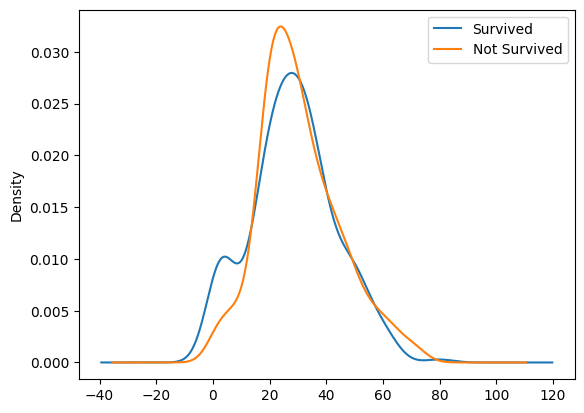

In [271]:
df[df['Survived'] == 1]['Age'].plot(kind = 'kde', label= 'Survived')
#df['Survived'] == 1 gives a boolean series (keeping only the passengers that survived)
#df[df['Survived'] == 1]['Age'] gives a series of ages, specifically the ones that survived
df[df['Survived']==0]['Age'].plot(kind = 'kde', label= 'Not Survived')
plt.legend()
plt.show()

In [272]:
# from ages 0-5, we can see the blue curve peak is higher so it dominates
# we can see that young children/infants had a higher chance of surviving (women and children given priority??)
# however, orange curve dominates for ages 20-40 and 60-80.. (lower chance of surviving if passenger age ranging from 20-40, 60-80)

In [273]:
# we can see that there is a slight dominance of blue curve of passengers aged ~40
# What was the mean passenger age in Pclass 1? (safest class)

In [274]:
df[df['Pclass']==1]['Age'].mean() 
#it's 38, and confirmed by the kde plot since there's a slight dominance 

np.float64(38.233440860215055)

In [275]:
#feature engineering on fare column (need to create a column that shows individual fares)

In [276]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [277]:
df[df['SibSp']==8]
#members of same family (sirname)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [278]:
df[df['Ticket']=='CA. 2343']
#here we can see that SibSp = 8, Parch = 2, so total family members = 11, but when we extract ticket the rows returned are only 7
#either the remaining members data is not present or the remaining 4 members got another Ticket


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [279]:
# extract all Sage family members
sage = df[df['Name'].str.contains('Sage')]

In [280]:
sage #confirmed that 4 members aren't in dataset
# check test.csv?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [281]:
df2 = pd.read_csv('test.csv')

In [282]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [283]:
new = pd.concat([df, df2], ignore_index = True)

In [284]:
new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [285]:
new[new['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1.0,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
1079,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S


In [286]:
# here we can see all sage family members
#another example
new['Ticket'].value_counts()

Ticket
CA. 2343        11
1601             8
CA 2144          8
347082           7
S.O.C. 14879     7
                ..
A.5. 3236        1
347086           1
365237           1
334915           1
28666            1
Name: count, Length: 929, dtype: int64

In [287]:
new['individual_fare'] = new['Fare']/(new['SibSp'] + new['Parch'] + 1)
#new column

In [288]:
new[['individual_fare', 'Fare']].describe()
#there's an individual person who paid 512...

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


<Axes: ylabel='individual_fare'>

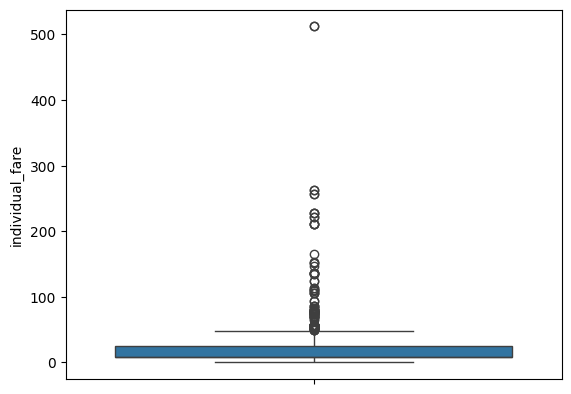

In [289]:
sns.boxplot(data = new['individual_fare'])

In [290]:
new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [291]:
# complete family member size
new['family_size'] = new['SibSp'] + new['Parch']

In [292]:
new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,0


In [293]:
new[new['Name'] == 'Sage, Master. Thomas Henry'] 
#family size is correct

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,10


In [294]:
#alone or not
def transform_family_size(num):
    if num == 0:
        return 'alone'
    elif num >= 1 and num < 5:
        return 'small'
    else:
        return 'large'

In [295]:
new['family_type'] = new['family_size'].apply(transform_family_size)

In [296]:
new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,1,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,1,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,0,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,1,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,0,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,0,alone
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,0,alone
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,0,alone
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,0,alone


In [297]:
pd.crosstab(new['Survived'], new['family_type'], normalize  ='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,85.106383,43.973941
1.0,30.353818,14.893617,56.026059


In [298]:
# from here we know that if family members are small it will lead to the highest chance of survival

### Multivariate analysis

In [299]:

new_corr =new.select_dtypes(include = 'number').corr()

In [300]:
new_corr['Survived']
# -ve inverse relationship, +ve linear relationship
# -ve relationship with p class (P class decreases -> closer to 1, survival incr)
# linear relationship with fare -> more fare, more chance of survival
# slight inverse relationship w/ age (older people have less chances of survival)

PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
individual_fare    0.221600
family_size        0.016639
Name: Survived, dtype: float64

<Axes: >

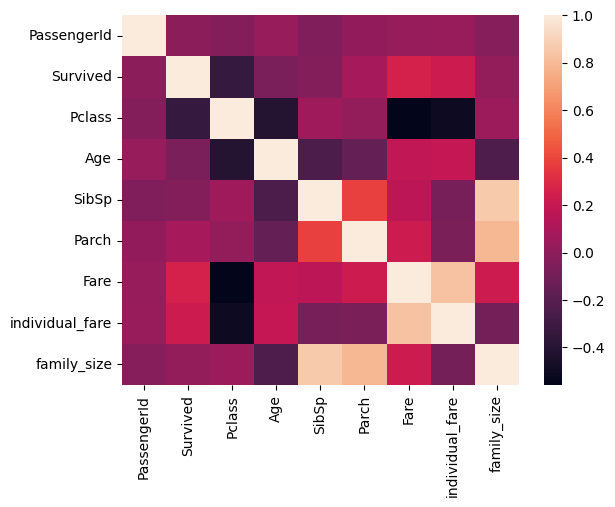

In [301]:
#we can plot heatmap to visualize correlation
sns.heatmap(data = new_corr)

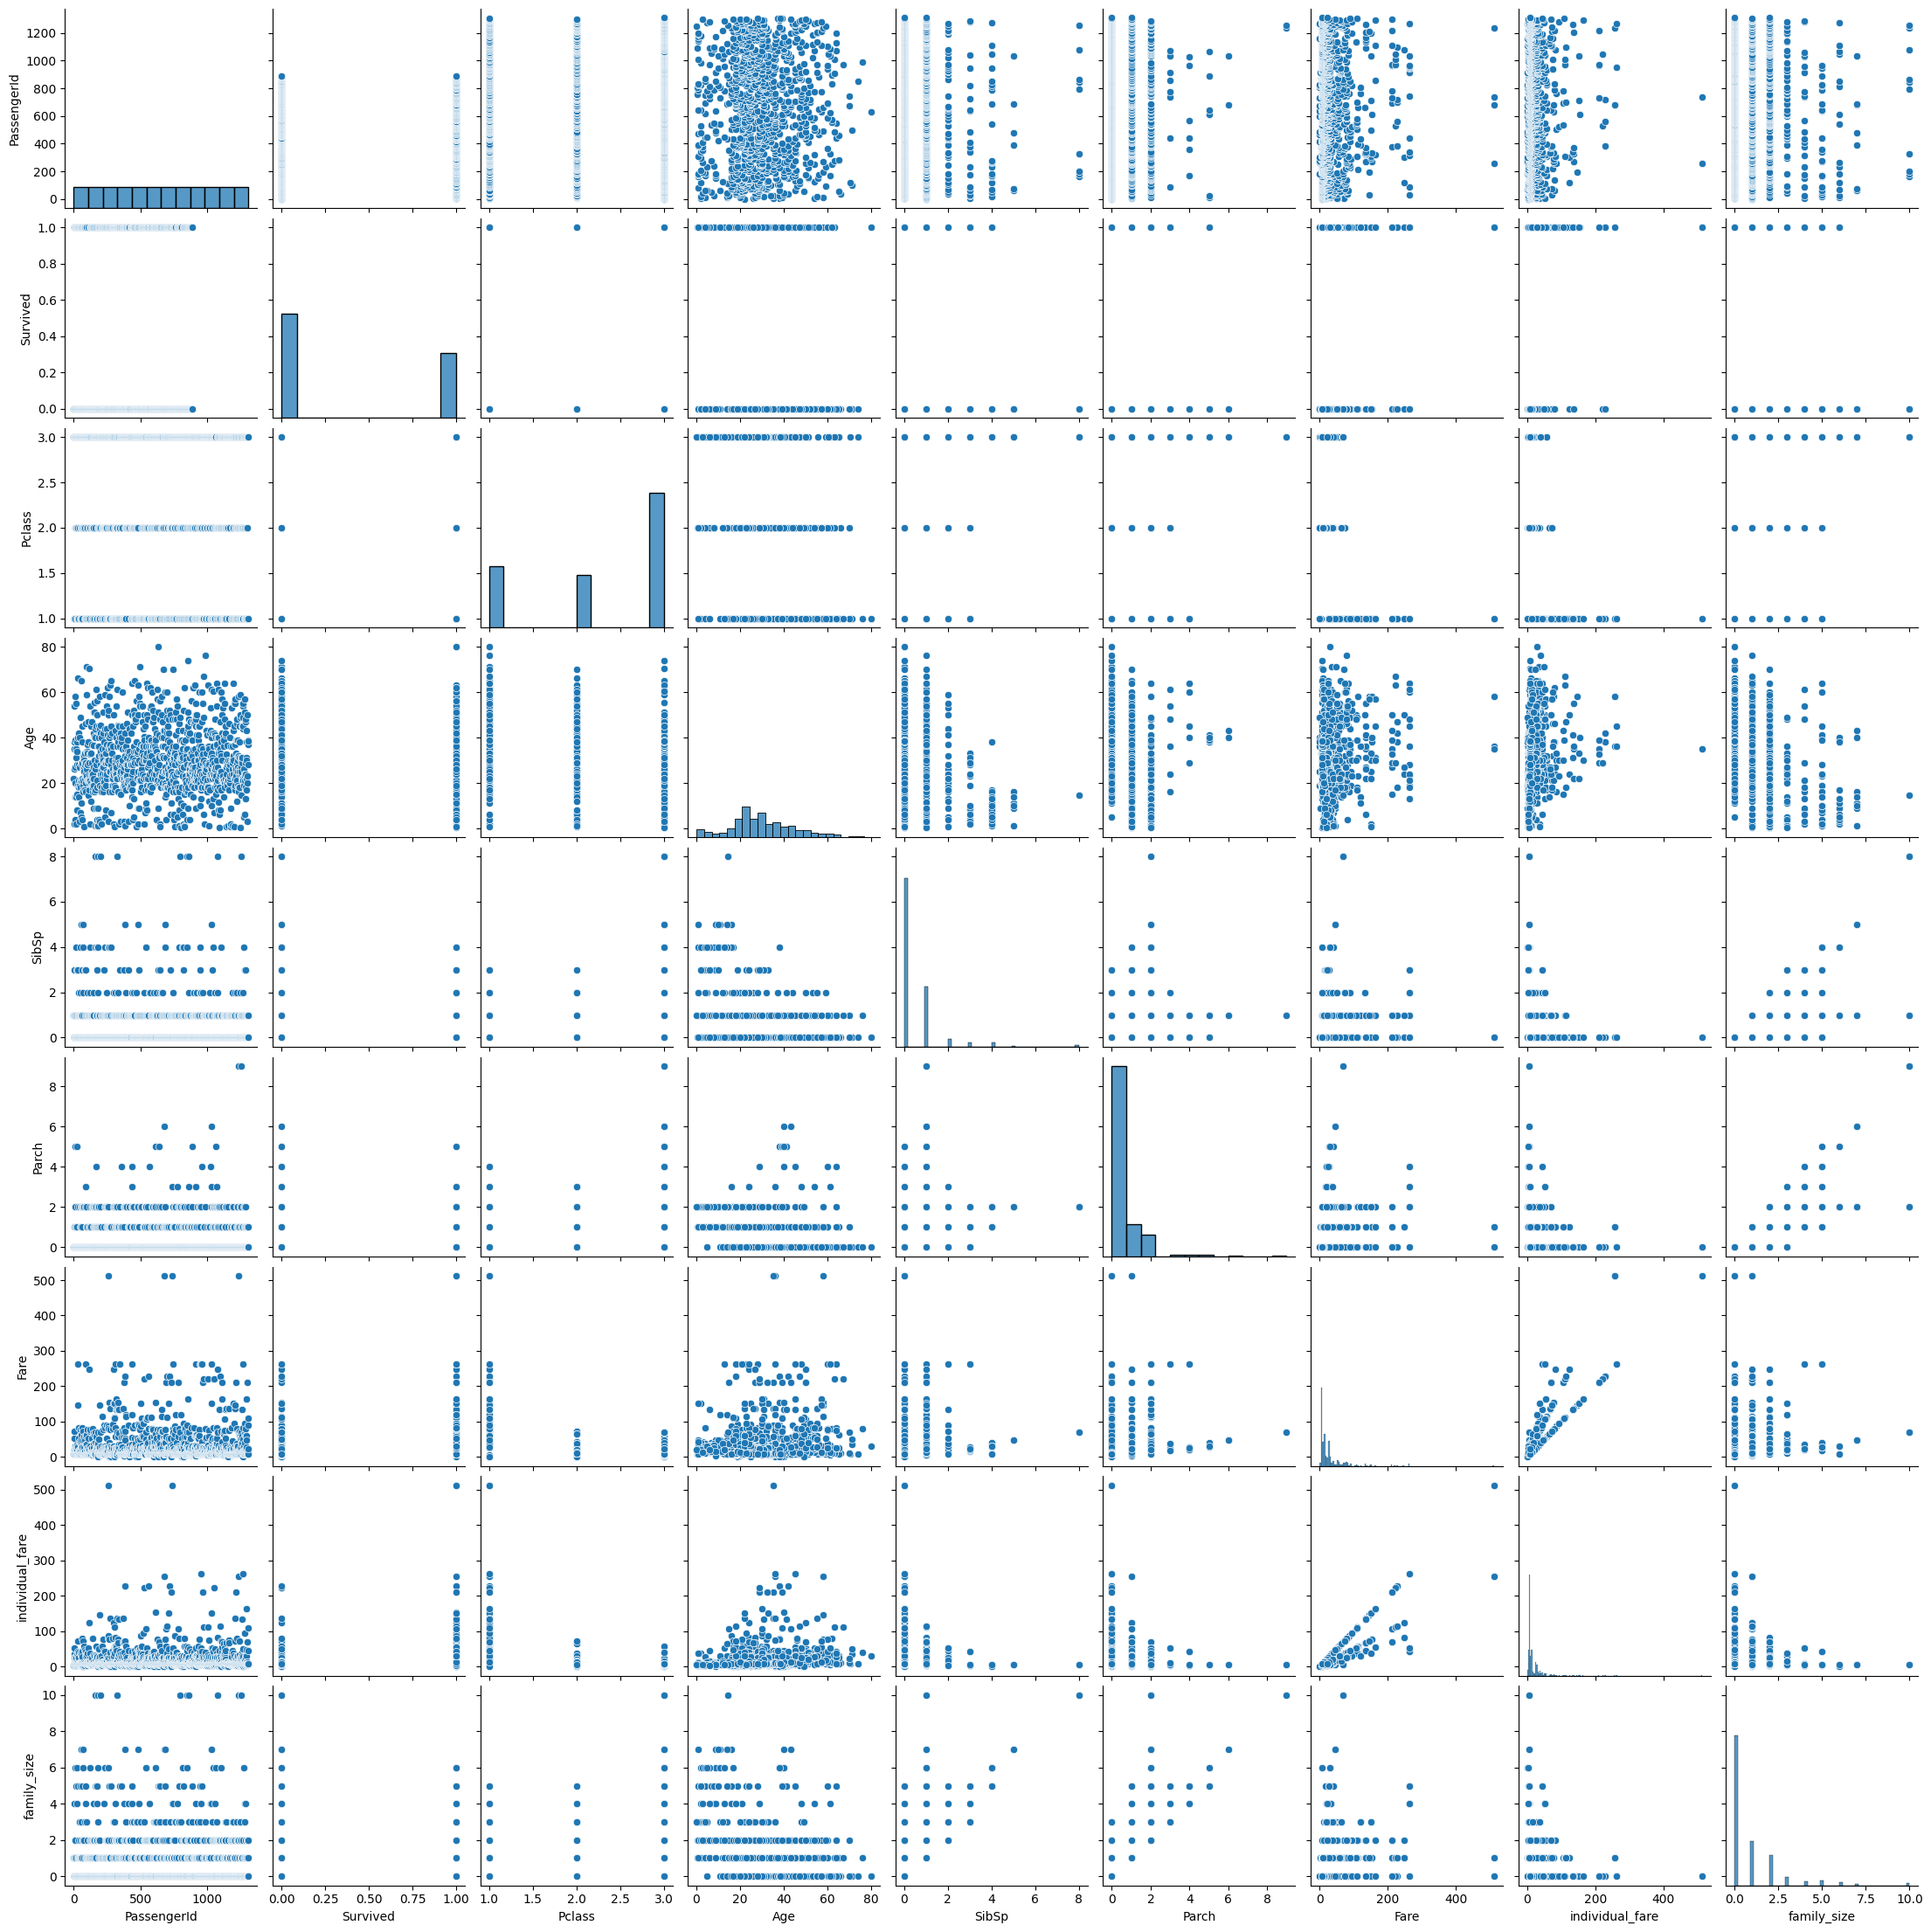

In [303]:
sns.pairplot(data = new)

In [305]:
df = pd.read_csv('practice_eda_dataset.csv')

In [307]:
df.head()

,ID,Age,Gender,Income,Smoker,Exercise Frequency,BMI,Cholesterol,Blood Pressure,City
0,1,22,Other,2500.0,Yes,Medium,26.9,220.6,136.3,New York
1,2,25,Male,2700.0,Yes,Medium,22.3,200.6,135.1,New York
2,3,29,Other,3200.0,No,Medium,26.4,NaN,113.4,Lahore
3,4,34,Other,NaN,No,Medium,28.9,202.4,118.7,New York
4,5,28,Male,15000.0,No,Medium,25.6,164.7,138.6,London


In [308]:
df.shape

(32, 10)

In [309]:
df.describe()

,ID,Age,Income,BMI,Cholesterol,Blood Pressure
count,32.000000,32.000000,29.000000,28.000000,30.000000,32.000000
mean,15.062500,36.843750,4637.931034,26.589286,177.510000,122.318750
std,8.710163,9.470189,2293.377701,4.767509,30.843368,20.620229
min,1.000000,22.000000,2500.000000,19.900000,142.900000,90.900000
25%,7.750000,28.750000,3200.000000,24.050000,159.700000,109.050000
50%,14.500000,36.500000,4500.000000,26.350000,171.550000,119.850000
75%,22.250000,45.250000,5200.000000,27.900000,195.450000,132.175000
max,30.000000,53.000000,15000.000000,45.000000,300.000000,200.000000


In [310]:
df.isnull().sum()

ID                    0
Age                   0
Gender                2
Income                3
Smoker                0
Exercise Frequency    0
BMI                   4
Cholesterol           2
Blood Pressure        0
City                  0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

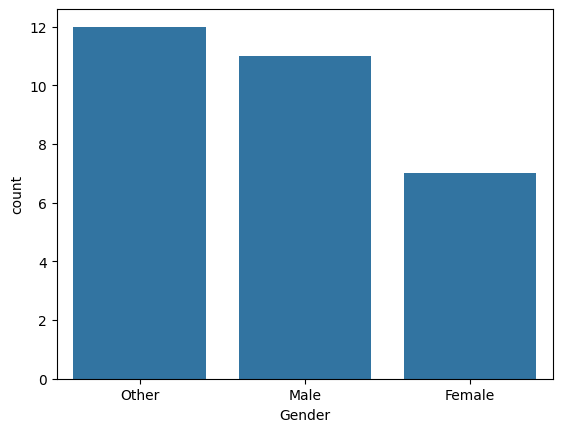

In [312]:
sns.barplot(data = df['Gender'].value_counts())

In [313]:
df['Gender'].mode()

0    Other
Name: Gender, dtype: object

In [314]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [315]:
df['Gender'].isnull().sum()

np.int64(0)

In [317]:
df['BMI'].mean()

np.float64(26.589285714285715)

In [318]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_26524\2472434603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].mean(), inplace = True)


In [319]:
df['BMI']

0     26.900000
1     22.300000
2     26.400000
3     28.900000
4     25.600000
5     26.589286
6     22.300000
7     24.700000
8     29.400000
9     21.600000
10    27.900000
11    30.200000
12    26.400000
13    19.900000
14    26.589286
15    24.800000
16    26.400000
17    27.200000
18    45.000000
19    22.500000
20    24.500000
21    22.100000
22    25.500000
23    24.700000
24    32.900000
25    26.589286
26    22.700000
27    26.300000
28    27.600000
29    31.900000
30    26.589286
31    27.900000
Name: BMI, dtype: float64

In [320]:
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_26524\3266680792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace = True)


In [321]:
df['Cholesterol']

0     220.60
1     200.60
2     177.51
3     202.40
4     164.70
5     172.10
6     142.90
7     174.30
8     204.10
9     174.80
10    160.60
11    171.00
12    198.10
13    173.60
14    201.20
15    147.20
16    158.20
17    167.30
18    147.30
19    177.51
20    152.60
21    202.90
22    300.00
23    167.20
24    187.50
25    143.50
26    163.40
27    176.30
28    158.80
29    159.40
30    172.10
31    160.60
Name: Cholesterol, dtype: float64

In [322]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
dtype: bool

In [323]:
#feature encoding

In [324]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [325]:
le

LabelEncoder()

In [ ]:
df['Gender_encoded'] = le.fit_transform(df['Gender'])
#label encoding can only be done on columns of ordinal categories (Low, Medium, High)

In [327]:
df['Gender_encoded']

0     2
1     1
2     2
3     2
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
12    1
13    2
14    0
15    1
16    0
17    0
18    0
19    0
20    1
21    1
22    0
23    0
24    1
25    1
26    1
27    2
28    2
29    2
30    1
31    2
Name: Gender_encoded, dtype: int64

In [329]:
df = pd.get_dummies(df, columns = ['City'], drop_first = True)

In [330]:
df


,ID,Age,Gender,Income,Smoker,Exercise Frequency,BMI,Cholesterol,Blood Pressure,Gender_encoded,City_Lahore,City_London,City_New York,City_Tokyo
0,1,22,Other,2500.0,Yes,Medium,26.900000,220.60,136.3,2,False,False,True,False
1,2,25,Male,2700.0,Yes,Medium,22.300000,200.60,135.1,1,False,False,True,False
2,3,29,Other,3200.0,No,Medium,26.400000,177.51,113.4,2,True,False,False,False
3,4,34,Other,NaN,No,Medium,28.900000,202.40,118.7,2,False,False,True,False
4,5,28,Male,15000.0,No,Medium,25.600000,164.70,138.6,1,False,True,False,False
5,6,40,Male,4800.0,Yes,High,26.589286,172.10,98.6,1,False,False,False,True
6,7,31,Other,4200.0,No,High,22.300000,142.90,125.1,2,False,False,True,False
7,8,35,Other,5000.0,No,Medium,24.700000,174.30,149.6,2,False,False,True,False
8,9,38,Other,NaN,Yes,High,29.400000,204.10,149.5,2,True,False,False,False
9,10,45,Other,5300.0,No,Low,21.600000,174.80,90.9,2,True,False,False,False


In [331]:
#ordinal encoding 
# custom mapping can be done with the following syntax
# education_map = {'Bachelors':1, 'Masters: 2, 'PhD':3}
# df['Education_ordinal'] = df['Education'].map(education_map)

### Sampling of Data

In [333]:
df = pd.read_csv('cancer patient data sets.csv')

In [334]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [335]:
df['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

<Axes: xlabel='Level', ylabel='count'>

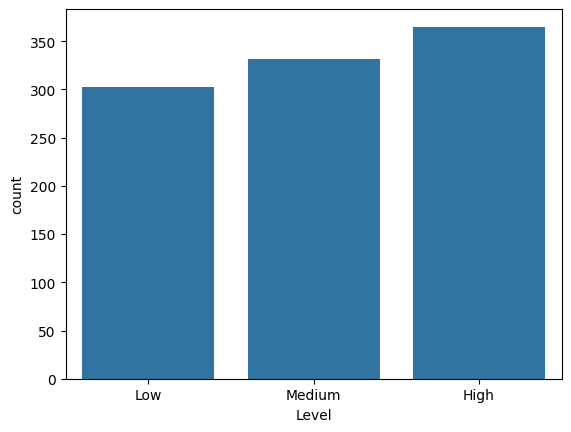

In [ ]:
sns.countplot(x='Level', data = df)
#plot countplot to see if target variable is balanced (distribution of data)

In [ ]:
# 📘 Handling Unbalanced Data — Sampling Techniques

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids, TomekLinks

# Assume X (features) and y (target) are defined
# --------------------------------------------------------------

# 1️⃣ Random Oversampling
# ✅ Duplicates samples from the minority class until both classes are balanced.
# ⚙️ Use when dataset is small and you want a simple balancing method.
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# --------------------------------------------------------------

# 2️⃣ SMOTE (Synthetic Minority Oversampling Technique)
# ✅ Creates synthetic (interpolated) samples between existing minority points.
# ⚙️ Use when you have continuous features and want to reduce overfitting caused by simple duplication.
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# --------------------------------------------------------------

# 3️⃣ ADASYN (Adaptive Synthetic Sampling)
# ✅ Similar to SMOTE, but focuses on harder-to-learn minority samples by creating more synthetic data near them.
# ⚙️ Use when some minority samples are under-represented or near complex boundaries.
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# --------------------------------------------------------------

# 4️⃣ Random Undersampling
# ✅ Randomly removes samples from the majority class to balance the dataset.
# ⚙️ Use when dataset is large and majority class dominates training time or causes imbalance.
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

# --------------------------------------------------------------

# 5️⃣ NearMiss
# ✅ Selects majority samples that are closest to the minority samples (based on distance).
# ⚙️ Use when you want to retain only informative majority samples and remove redundant ones.
nm = NearMiss(version=1)
X_nm, y_nm = nm.fit_resample(X, y)

# --------------------------------------------------------------

# 6️⃣ Tomek Links
# ✅ Removes ambiguous samples that lie near class boundaries (data cleaning, not true balancing).
# ⚙️ Use after oversampling (like SMOTE) to clean overlapping regions.
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)

# --------------------------------------------------------------

# 7️⃣ Cluster Centroids
# ✅ Uses K-Means to cluster the majority class and replace clusters with their centroids.
# ⚙️ Use when you want to undersample without losing overall class distribution structure.
cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X, y)

# --------------------------------------------------------------

# ✅ Tip: Always compare class counts before and after resampling
import pandas as pd
print("Before:", pd.Series(y).value_counts().to_dict())
print("After (SMOTE):", pd.Series(y_smote).value_counts().to_dict())
